###This project aims to analyze factors influencing house prices in Melbourne. We explore various property characteristics, such as area, age, and location, and visualize their relationships with price.

In [47]:
# Importing essential libraries for data manipulation, analysis, and visualization:
# - matplotlib.pyplot: For creating static visualizations.
# - plotly.express: For interactive and dynamic visualizations.
# - pandas: For efficient data manipulation and analysis.
# - numpy: For numerical operations and mathematical functions.

import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

In [48]:
# Load the dataset directly from a remote URL using pandas.
# The dataset contains information about Melbourne housing, and the first few rows are displayed for a quick overview.

df = pd.read_csv("https://raw.githubusercontent.com/zoxidjoon/datasets/main/melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [52]:
# Calculate the age of the property by subtracting the year it was built ("YearBuilt")
# from the current year (2024). This new feature provides insights into how property age
# influences its price or other characteristics.
df['Age_of_Property'] = 2024 - df['YearBuilt']

In [54]:
# Drop unnecessary columns that are not relevant for analysis.
# These include details like property type, seller information, and redundant numerical data.

df.drop(columns=['Suburb', 'Type', 'Method',
                 'SellerG', 'Date', 'Distance',
                 'Postcode', 'Bedroom2', 'Bathroom',
                 'Car', 'BuildingArea',
                 'YearBuilt', 'CouncilArea'], inplace=True)

# Rename columns for better readability and to standardize naming conventions.
# "Landsize" is renamed to "Area_m2" to specify units, and "Regionname" is shortened to "Region".

df.rename(columns = {"Landsize":"Area_m2", "Regionname":"Region"}, inplace=True)

In [55]:
# Using Plotly Express to create an interactive scatter map.
fig = px.scatter_mapbox(
    df,  # The dataset containing information about properties.
    lat="Lattitude",  # Column specifying latitude coordinates for plotting points.
    lon="Longtitude",  # Column specifying longitude coordinates for plotting points.
    center={"lat": -37.80, "lon": 145.04},  # Center the map near Melbourne.
    width=600,  # Set the width of the map in pixels.
    height=600,  # Set the height of the map in pixels.
    hover_data=["Price"],  # Display the price of the property when hovering over a point.
)

# Update the map style to use OpenStreetMap for better context and visuals.
fig.update_layout(mapbox_style="open-street-map")

# Display the interactive map.
fig.show()


In [56]:
# Retrieve and display the top 5 most frequent values in the "Region" column.
# This helps identify which regions are most represented in the dataset.

df.Region.value_counts().head()

,count
Region,
Southern Metropolitan,4668
Northern Metropolitan,3869
Western Metropolitan,2938
Eastern Metropolitan,1468
South-Eastern Metropolitan,450


In [57]:
# Generate descriptive statistics for the "Area_m2" and "Price" columns.
# This includes metrics such as mean, standard deviation, min, max, and quartiles,
# providing insights into the distribution and spread of these key numerical variables.

df[["Area_m2", "Price"]].describe()

,Area_m2,Price
count,13518.000000,1.351800e+04
mean,558.110593,1.074796e+06
std,3998.194560,6.398586e+05
min,0.000000,8.500000e+04
25%,178.000000,6.500000e+05
50%,442.500000,9.010000e+05
75%,651.000000,1.328000e+06
max,433014.000000,9.000000e+06


Text(0.5, 1.0, 'Distribution of Home Sizes')

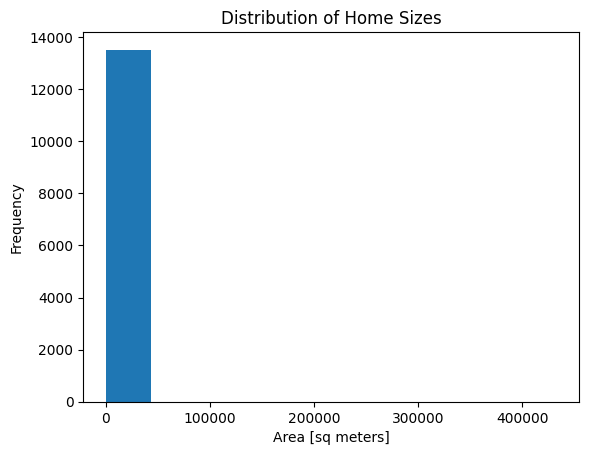

In [58]:
# Create a histogram to visualize the distribution of home sizes in square meters.
# The x-axis represents the area of homes (in square meters),
# while the y-axis shows the frequency of homes within each size range.
plt.hist(df["Area_m2"])
plt.xlabel("Area [sq meters]")  # Label the x-axis to indicate home sizes.
plt.ylabel("Frequency")         # Label the y-axis to show count/frequency.
plt.title("Distribution of Home Sizes")  # Add a title for context.

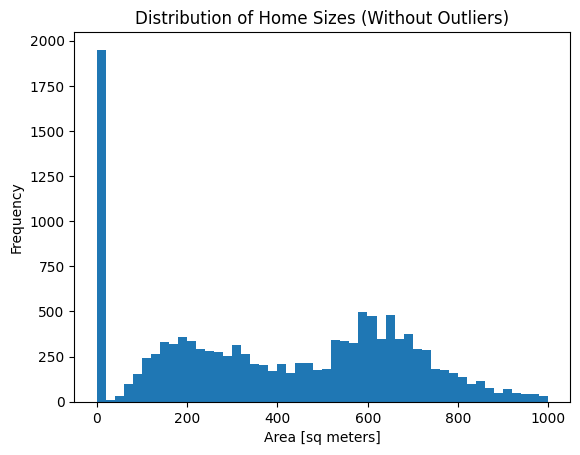

In [72]:
# Filter the dataset to exclude properties with extremely large areas (>1000 sq meters)
# to focus on typical property sizes and reduce the effect of outliers.
filtered_df = df[df["Area_m2"] < 1000]

# Plot a histogram of the filtered property sizes to visualize their distribution.
# The x-axis shows the home sizes in square meters, while the y-axis indicates frequency.
plt.hist(filtered_df["Area_m2"], bins=50)
plt.xlabel("Area [sq meters]")  # Label for the x-axis indicating home sizes.
plt.ylabel("Frequency")         # Label for the y-axis representing the count of properties.
plt.title("Distribution of Home Sizes (Without Outliers)")  # Descriptive title for clarity.
plt.show()  # Display the plot.

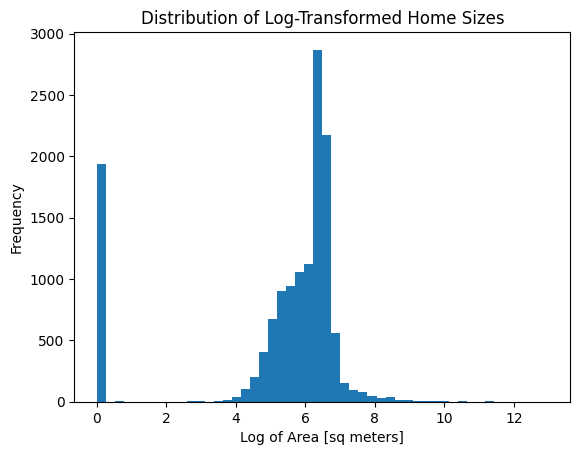

In [73]:
# Apply a logarithmic transformation to the "Area_m2" column to reduce skewness
# and normalize the distribution of property sizes.
df["Log_Area"] = np.log1p(df["Area_m2"])

# Plot a histogram of the log-transformed property sizes to visualize their distribution.
# The x-axis represents the logarithmic values of home sizes, and the y-axis shows frequency.
plt.hist(df["Log_Area"], bins=50)
plt.xlabel("Log of Area [sq meters]")  # Label for the x-axis indicating the transformed home sizes.
plt.ylabel("Frequency")               # Label for the y-axis representing the count of properties.
plt.title("Distribution of Log-Transformed Home Sizes")  # Title for context about the transformation.
plt.show()  # Display the histogram.

Text(0.5, 1.0, 'Distribution of Home Sizes')

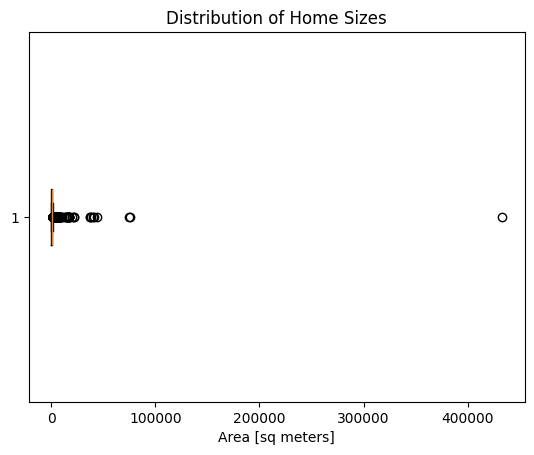

In [59]:
# Create a horizontal boxplot to visualize the distribution of home sizes in square meters.
# This helps identify the median, quartiles, and potential outliers in the "Area_m2" data.
plt.boxplot(df["Area_m2"], vert=False)  # Set 'vert=False' for a horizontal orientation.
plt.xlabel("Area [sq meters]")  # Label the x-axis to indicate home sizes.
plt.title("Distribution of Home Sizes")  # Add a title to provide context for the plot.

Text(0.5, 1.0, 'Distribution of Home Prices')

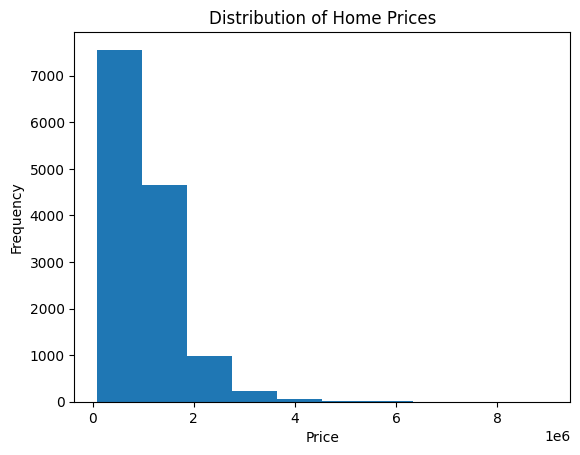

In [60]:
# Create a histogram to visualize the distribution of home prices.
# The x-axis represents the price of homes, while the y-axis shows the frequency
# of homes within each price range.
plt.hist(df["Price"])
plt.xlabel("Price")  # Label the x-axis to indicate the price of homes.
plt.ylabel("Frequency")  # Label the y-axis to show the count of homes.
plt.title("Distribution of Home Prices")  # Add a title for context.

Text(0.5, 1.0, 'Distribution of Home Prices')

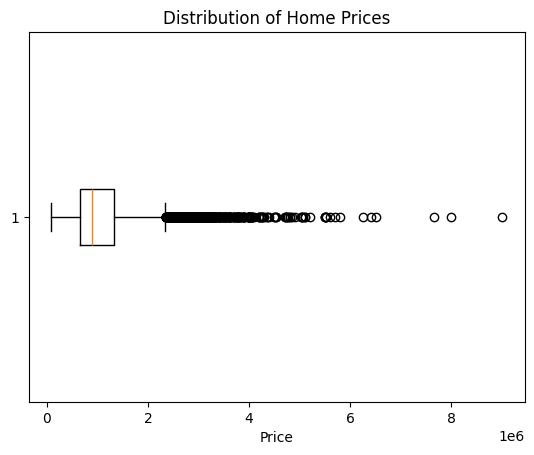

In [61]:
# Create a horizontal boxplot to visualize the distribution of home prices.
# This boxplot highlights the median, quartiles, and any potential outliers in the "Price" data.
plt.boxplot(df["Price"], vert=False)  # Set 'vert=False' for a horizontal orientation.
plt.xlabel("Price")  # Label the x-axis to represent the home prices.
plt.title("Distribution of Home Prices")  # Add a title to provide context for the visualization.

In [62]:
# Calculate the mean price of homes for each region,
# then sort the regions by average price in descending order.
# This helps identify which regions have the highest average home prices.
region_mean_price = df.groupby("Region")["Price"].mean().sort_values(ascending=False)
region_mean_price

,Price
Region,
Southern Metropolitan,1.372327e+06
Eastern Metropolitan,1.104081e+06
South-Eastern Metropolitan,9.229438e+05
Northern Metropolitan,8.963281e+05
Western Metropolitan,8.663910e+05
Eastern Victoria,6.999808e+05
Northern Victoria,5.947000e+05
Western Victoria,3.975234e+05


<Axes: title={'center': 'Mean House Price by Region'}, xlabel='Region', ylabel='Mean Price'>

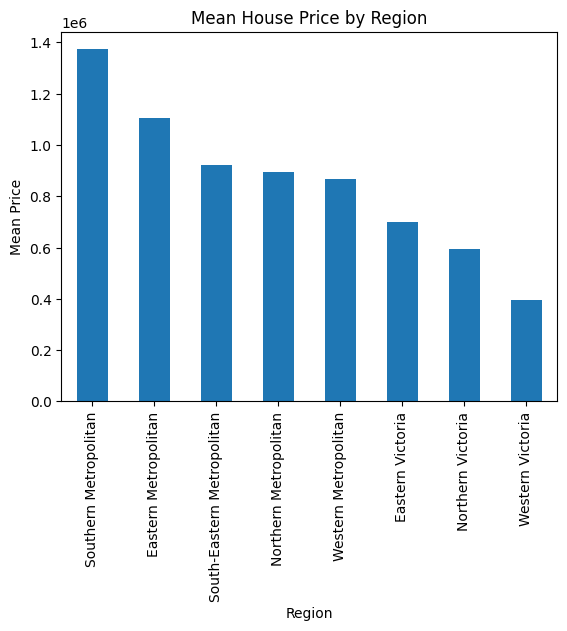

In [63]:
# Plot a bar chart to visualize the mean house price for each region.
# The x-axis represents the regions, while the y-axis shows the mean house price.
# The title provides context for the chart, showing how prices vary across regions.
region_mean_price.plot(
    kind="bar",  # Choose a bar chart for clear comparison between regions.
    xlabel="Region",  # Label the x-axis for regions.
    ylabel="Mean Price",  # Label the y-axis for mean house prices.
    title="Mean House Price by Region"  # Add a descriptive title.
)

Text(0.5, 1.0, 'Price vs Area')

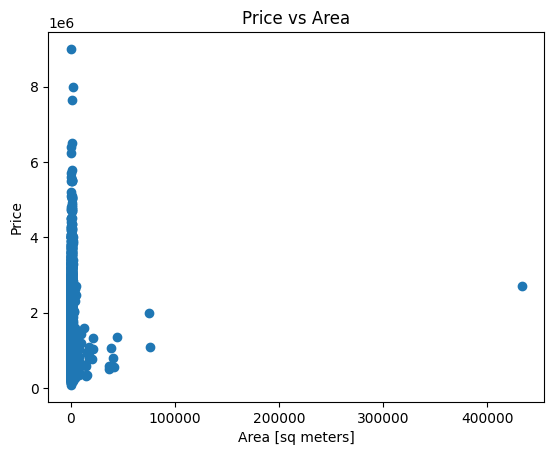

In [64]:
# Create a scatter plot to visualize the relationship between the area of homes (in square meters)
# and their price. Each point represents a property, showing how price varies with size.
plt.scatter(x=df["Area_m2"], y=df["Price"])
plt.xlabel("Area [sq meters]")  # Label the x-axis for home area in square meters.
plt.ylabel("Price")  # Label the y-axis for home prices.
plt.title("Price vs Area")  # Add a title to the plot for context.

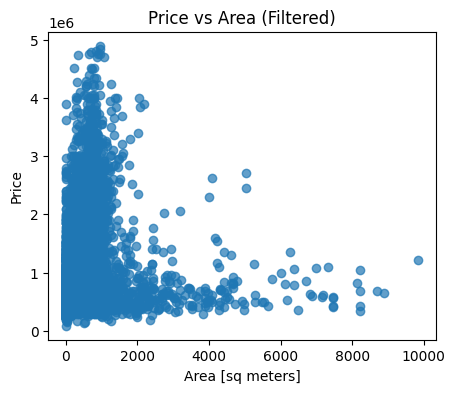

In [68]:
# Filter out extreme outliers for better scaling (e.g., area > 10,000 m² or price > 5,000,000)
filtered_df = df[(df["Area_m2"] < 10000) & (df["Price"] < 5000000)]

# Create a scatter plot after removing outliers
plt.figure(figsize=(5, 4))
plt.scatter(x=filtered_df["Area_m2"], y=filtered_df["Price"], alpha=0.7)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price")
plt.title("Price vs Area (Filtered)")
plt.show()

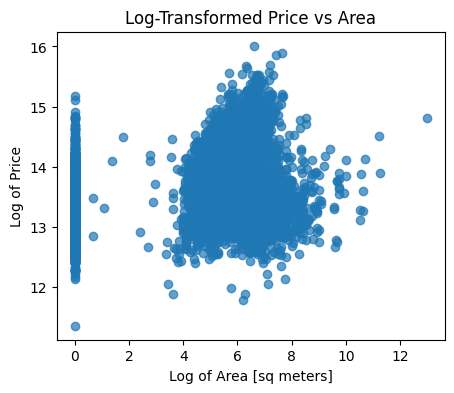

In [70]:
# Apply log transformation to area and price
df["Log_Area"] = np.log1p(df["Area_m2"])
df["Log_Price"] = np.log1p(df["Price"])

# Create a scatter plot for log-transformed data
plt.figure(figsize=(5, 4))
plt.scatter(x=df["Log_Area"], y=df["Log_Price"], alpha=0.7)
plt.xlabel("Log of Area [sq meters]")
plt.ylabel("Log of Price")
plt.title("Log-Transformed Price vs Area")
plt.show()

In [65]:
# Calculate the Pearson correlation coefficient between "Price" and "Area_m2".
# This value indicates the strength and direction of the linear relationship between these two variables.
# A positive correlation would suggest that as area increases, price tends to increase as well.
p_correlation = df.Area_m2.corr(df.Price)
print("Correlation of 'Area_m2' and 'Price':", p_correlation)

Correlation of 'Area_m2' and 'Price': 0.03748177366256409


### Property Size (Area) is the most effective predictor of house prices in Melbourne, followed by location (Region). These factors are crucial for understanding how the market operates, and they should be prioritized when evaluating house prices or making investment decisions.

### The analysis reveals that location, property size, and the age of the property are key factors influencing house prices in Melbourne. While the area of the property strongly correlates with price, regional differences in average prices highlight the importance of considering the local real estate market. These findings can serve as a foundation for further investigations into specific areas or property types, and can also be used to guide property investment decisions in Melbourne.